In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the enrichment file
enrichment_data = pd.read_csv("Enrichment.csv")

# Step 2: Basic data exploration
# Display the first few rows of the dataframe
print("First few rows of the enrichment data:")
print(enrichment_data)

# Display summary statistics
print("\nSummary statistics:")
print(enrichment_data.describe())

First few rows of the enrichment data:
     background size chart color  \
0              21031     #e41a1c   
1              21031     #377eb8   
2              21031     #4daf4a   
3              21031     #984ea3   
4              21031     #ff7f00   
..               ...         ...   
272            21031         NaN   
273            21031         NaN   
274            21031         NaN   
275            21031         NaN   
276            20212         NaN   

                                           description  \
0    "The regulated release of hormones, substances...   
1    "The directed movement of hormones into, out o...   
2    "Any process that modulates the levels of horm...   
3    "Any process that results in a change in state...   
4    "The regulated release of a peptide hormone fr...   
..                                                 ...   
272  "Any process that stops, prevents, or reduces ...   
273  "The process whose specific outcome is the pro...   
274  "

In [ ]:
!pip install gseapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.1 MB/s eta 0:00:00


In [ ]:
#Gene set enrichment analysis (GSEA) and define gene sets representing specific biological pathways, functions, or processes, as well as ranking genes based on a relevant metric such as "logFC" or "t" statistics
import pandas as pd
import gseapy as gp

# Step 1: Load the data
enrichment_data = pd.read_csv("Enrichment.csv")
gene_expression_data = pd.read_csv("72_genes.csv")

# Step 2: Perform enrichment analysis
# Code for enrichment analysis depends on the specific library or method you choose
# Using gseapy:
enrichment_results = gp.enrichr(gene_list=gene_expression_data['Genes'], gene_sets='GO_Biological_Process_2023', organism='human')

# Step 3: Define gene sets
# Extract enriched terms or pathways from enrichment results
enriched_terms = enrichment_results.res2d.index.tolist()
# Define gene sets based on enriched terms
gene_sets = {term: enrichment_results.res2d['Genes'][term].split(';') for term in enriched_terms}
# Save gene sets to a GMT file
with open('gene_sets.gmt', 'w') as f:
    for term, genes in gene_sets.items():
        f.write(f"{term}\t\t{' '.join(genes)}\n")

# Step 4: Rank genes
# Sort genes based on logFC or t statistic
ranked_genes = gene_expression_data.sort_values(by='logFC', ascending=False)

# Step 5: Perform GSEA with adjusted parameters
gsea_results = gp.prerank(rnk=ranked_genes[['Genes', 'logFC']], gene_sets='gene_sets.gmt', outdir='gsea_output', min_size=1, max_size=1000)

In [ ]:
#Create a GMT (Gene Matrix Transposed) file containing the defined gene sets.

import gseapy as gp

# Step 1: Load gene expression data
expression_data = pd.read_csv("72_genes.csv")

# Step 2: Rank genes based on logFC or t statistic
# For example, if logFC is used for ranking:
ranked_genes = expression_data.sort_values(by='logFC', ascending=False)

# Step 3: Perform GSEA
gsea_results = gp.prerank(rnk=ranked_genes[['Genes', 'logFC']], gene_sets='gene_sets.gmt', outdir='gsea_output', min_size=1, max_size=1000)

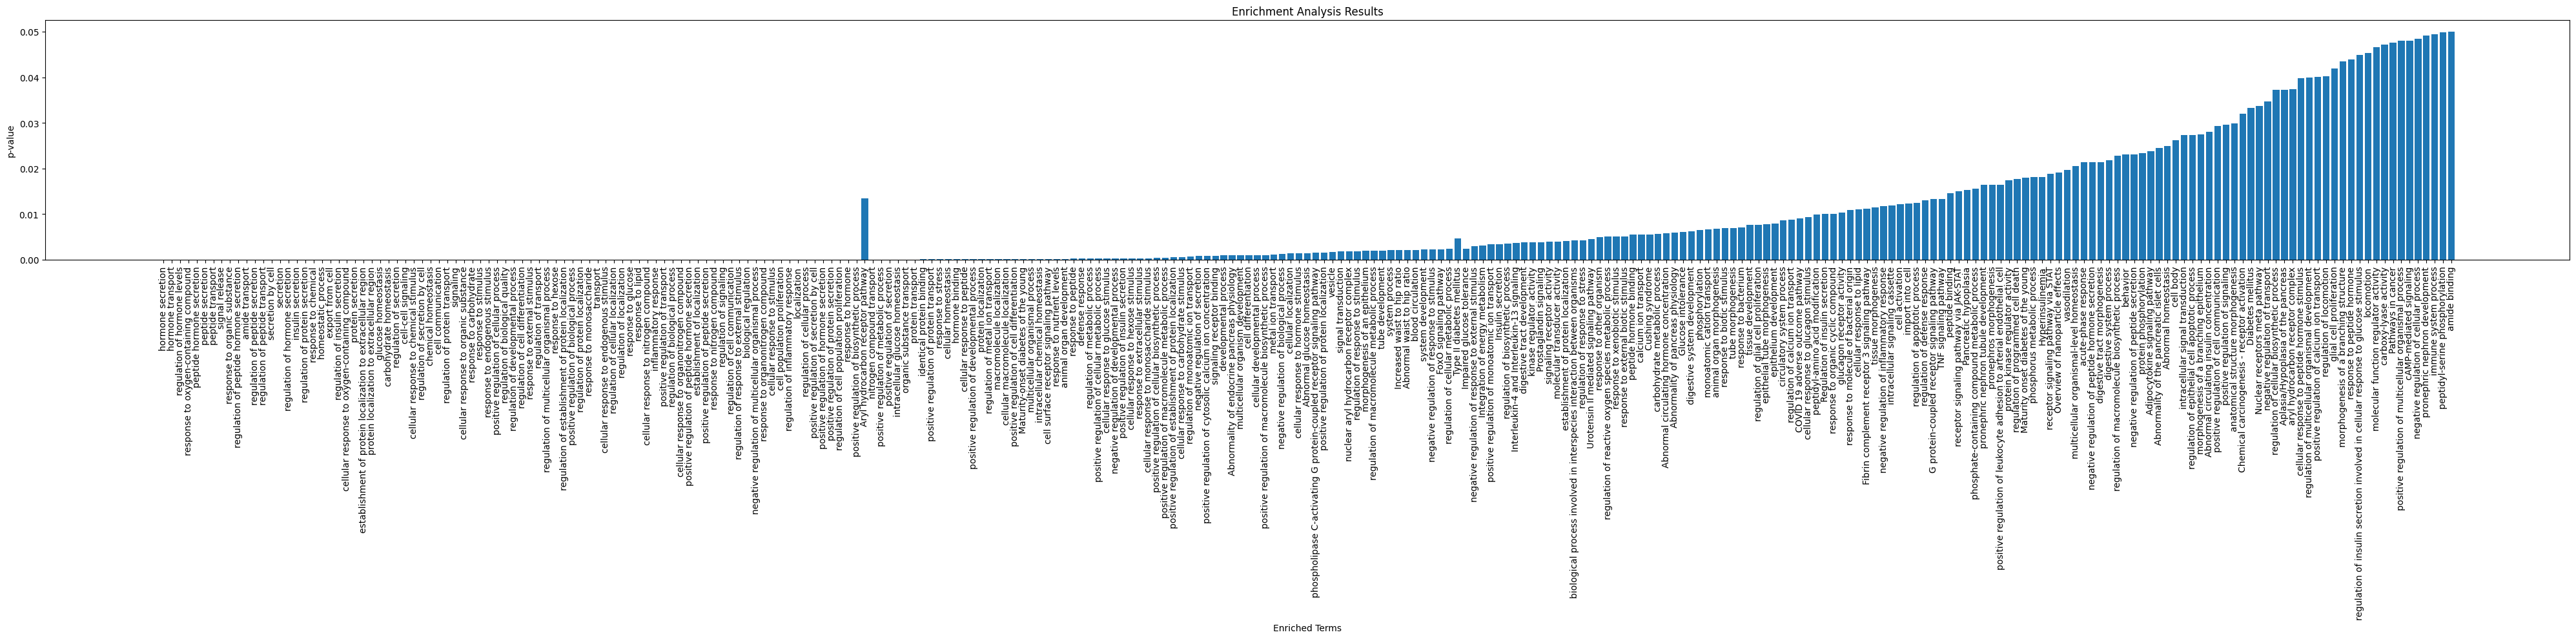

In [ ]:
#Enrichment Analysis Visualization (Bar Chart)

import pandas as pd
import matplotlib.pyplot as plt

# Load enrichment data
enrichment_data = pd.read_csv("Enrichment.csv")

# Plot bar chart
plt.figure(figsize=(40, 10))
plt.bar(enrichment_data['term name'], enrichment_data['p-value'])
plt.xlabel('Enriched Terms')
plt.ylabel('p-value')
plt.title('Enrichment Analysis Results')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
#Gene set enrichment analysis (GSEA)

import pandas as pd
import gseapy as gp

# Step 1: Load the Data
data = pd.read_csv("72_genes.csv")

# Step 2: Rank Genes
# Rank genes based on the log fold change (logFC) or t statistic
ranked_genes = data.sort_values(by='logFC', ascending=False)['Genes'].tolist()


# Step 4: Run GSEA
# Perform GSEA using the ranked gene list and predefined gene sets
enrichment_results = gp.enrichr(gene_list=ranked_genes, gene_sets='GO_Biological_Process_2023', organism='Human')

# Step 5: Interpret Results
# Extract and analyze the enriched gene sets and associated statistics (based on., enrichment scores, p-values)
enrichment_results.res2d.head()  # Display the top enriched gene sets and associated statistics

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Regulation Of Insulin Secretion (GO:0050796),10/87,6.127059e-13,3.685426e-10,0,0,41.581483,1169.308370,NEUROD1;G6PC2;SLC30A8;ALOX5;GHRL;FFAR1;TNF;GCK...
1,GO_Biological_Process_2023,Glucose Homeostasis (GO:0042593),10/87,6.127059e-13,3.685426e-10,0,0,41.581483,1169.308370,NEUROD1;KLF7;G6PC2;SLC30A8;WFS1;ALOX5;GCGR;PCK...
2,GO_Biological_Process_2023,Regulation Of Apoptotic Process (GO:0042981),14/705,1.809799e-07,5.890900e-05,0,0,6.719846,104.324808,ALK;BCL2A1;WFS1;TNF;EGFR;NEUROD1;CXCL10;AHI1;S...
3,GO_Biological_Process_2023,Regulation Of Inflammatory Response (GO:0050727),9/240,1.958736e-07,5.890900e-05,0,0,12.181200,188.148327,IL15;ALOX5;FFAR4;ARNT;GHRL;AHR;TNF;TLR2;SNCA
4,GO_Biological_Process_2023,Positive Regulation Of Protein Secretion (GO:0...,6/76,3.153685e-07,7.587767e-05,0,0,25.789610,386.058191,SLC30A8;GHRL;FFAR1;GCK;ABCG1;TLR2


from matplotlib import pyplot as plt
_df_0['P-value'].plot(kind='hist', bins=20, title='P-value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Adjusted P-value'].plot(kind='hist', bins=20, title='Adjusted P-value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Odds Ratio'].plot(kind='hist', bins=20, title='Odds Ratio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Combined Score'].plot(kind='hist', bins=20, title='Combined Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Term').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Overlap').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Genes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='P-value', y='Adjusted P-value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Adjusted P-value', y='Odds Ratio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Odds Ratio', y='Combined Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['P-value']
  ys = series['Odds Ratio']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('P-value', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Term')):
  _plot_series(series, series_name, i)
  fig.legend(title='Term', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('P-value')
_ = plt.ylabel('Odds Ratio')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['P-value']
  ys = series['Odds Ratio']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('P-value', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Overlap')):
  _plot_series(series, series_name, i)
  fig.legend(title='Overlap', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('P-value')
_ = plt.ylabel('Odds Ratio')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['P-value']
  ys = series['Odds Ratio']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('P-value', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Genes')):
  _plot_series(series, series_name, i)
  fig.legend(title='Genes', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('P-value')
_ = plt.ylabel('Odds Ratio')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['P-value']
  ys = series['Combined Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('P-value', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Term')):
  _plot_series(series, series_name, i)
  fig.legend(title='Term', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('P-value')
_ = plt.ylabel('Combined Score')

from matplotlib import pyplot as plt
_df_14['P-value'].plot(kind='line', figsize=(8, 4), title='P-value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Adjusted P-value'].plot(kind='line', figsize=(8, 4), title='Adjusted P-value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Odds Ratio'].plot(kind='line', figsize=(8, 4), title='Odds Ratio')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Combined Score'].plot(kind='line', figsize=(8, 4), title='Combined Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Overlap'].value_counts()
    for x_label, grp in _df_18.groupby('Term')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Term')
_ = plt.ylabel('Overlap')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Genes'].value_counts()
    for x_label, grp in _df_19.groupby('Overlap')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Overlap')
_ = plt.ylabel('Genes')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Term'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='P-value', y='Term', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Overlap'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='P-value', y='Overlap', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Genes'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='P-value', y='Genes', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['Term'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='Adjusted P-value', y='Term', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_24['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['P-value'].plot(kind='hist', bins=20, title='P-value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Adjusted P-value'].plot(kind='hist', bins=20, title='Adjusted P-value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Odds Ratio'].plot(kind='hist', bins=20, title='Odds Ratio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_28.groupby('Term').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_29.groupby('Overlap').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_30.groupby('Genes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31.plot(kind='scatter', x='index', y='P-value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32.plot(kind='scatter', x='P-value', y='Adjusted P-value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33.plot(kind='scatter', x='Adjusted P-value', y='Odds Ratio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34.plot(kind='scatter', x='Odds Ratio', y='Combined Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Odds Ratio']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_35.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Term')):
  _plot_series(series, series_name, i)
  fig.legend(title='Term', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Odds Ratio')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Odds Ratio']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_36.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Overlap')):
  _plot_series(series, series_name, i)
  fig.legend(title='Overlap', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Odds Ratio')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Odds Ratio']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_37.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Genes')):
  _plot_series(series, series_name, i)
  fig.legend(title='Genes', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Odds Ratio')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Combined Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_38.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Term')):
  _plot_series(series, series_name, i)
  fig.legend(title='Term', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Combined Score')

from matplotlib import pyplot as plt
_df_39['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_40['P-value'].plot(kind='line', figsize=(8, 4), title='P-value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_41['Adjusted P-value'].plot(kind='line', figsize=(8, 4), title='Adjusted P-value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_42['Odds Ratio'].plot(kind='line', figsize=(8, 4), title='Odds Ratio')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Overlap'].value_counts()
    for x_label, grp in _df_43.groupby('Term')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Term')
_ = plt.ylabel('Overlap')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Genes'].value_counts()
    for x_label, grp in _df_44.groupby('Overlap')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Overlap')
_ = plt.ylabel('Genes')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_45['Term'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_45, x='index', y='Term', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_46['Overlap'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_46, x='index', y='Overlap', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_47['Genes'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_47, x='index', y='Genes', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_48['Term'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_48, x='P-value', y='Term', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
import gseapy as gp

# Print the available gene set databases and their descriptions
gp.get_library_name()  # This will print the available gene set databases and their descriptions


['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbatio

In [ ]:
import gseapy as gp

# Define your gene list (ranked genes)
gene_list = '72_genes.csv'

# Run GSEA for GO Biological Process gene sets
enrichment_results_go_bp = gp.enrichr(gene_list=gene_list, gene_sets='GO_Biological_Process_2023', organism='Human')

# Run GSEA for KEGG gene sets
enrichment_results_kegg = gp.enrichr(gene_list=gene_list, gene_sets='KEGG_2021_Human', organism='Human')

# Run GSEA for GO Molecular Function gene sets
enrichment_results_go_mf = gp.enrichr(gene_list=gene_list, gene_sets='GO_Molecular_Function_2023', organism='Human')

# Interpret the results
print("GO Biological Process:")
print(enrichment_results_go_bp.res2d.head())

print("\nKEGG Pathways:")
print(enrichment_results_kegg.res2d.head())

print("GO Molecular Function:")
print(enrichment_results_go_mf.res2d.head())


GO Biological Process:
                     Gene_set  \
0  GO_Biological_Process_2023   
1  GO_Biological_Process_2023   
2  GO_Biological_Process_2023   
3  GO_Biological_Process_2023   
4  GO_Biological_Process_2023   

                                                Term Overlap       P-value  \
0       Regulation Of Insulin Secretion (GO:0050796)   10/87  7.074749e-13   
1                   Glucose Homeostasis (GO:0042593)   10/87  7.074749e-13   
2       Regulation Of Apoptotic Process (GO:0042981)  14/705  2.167493e-07   
3   Regulation Of Inflammatory Response (GO:0050727)   9/240  2.211051e-07   
4  Positive Regulation Of Protein Secretion (GO:0...    6/76  3.425811e-07   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0      4.255461e-10            0                     0   40.919398   
1      4.255461e-10            0                     0   40.919398   
2      6.649735e-05            0                     0    6.605607   
3      6.649735e-05          

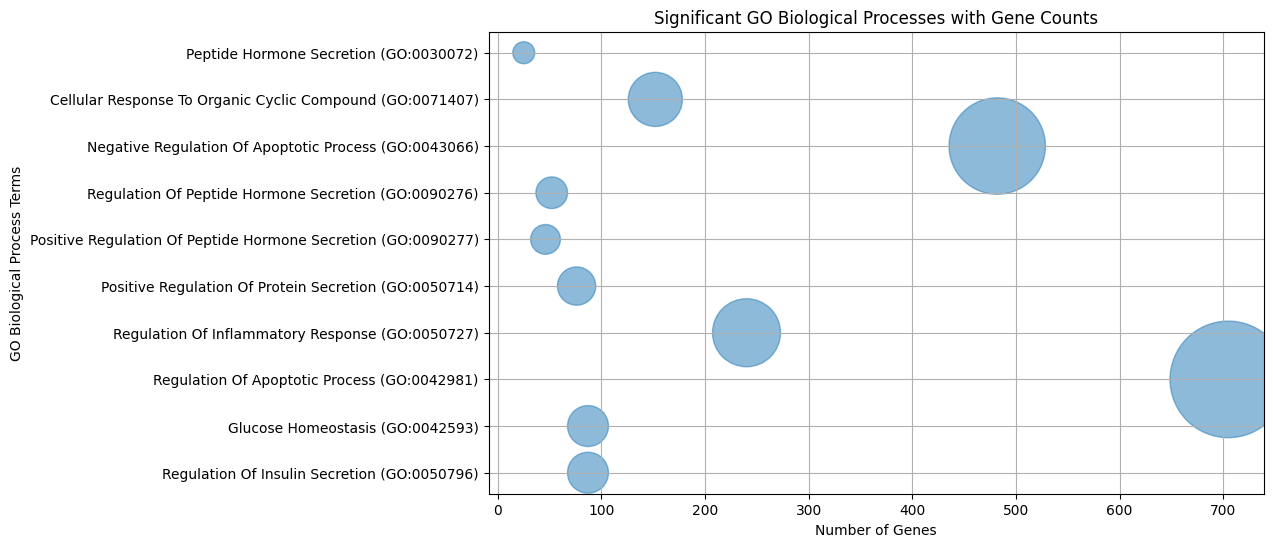

In [ ]:
import matplotlib.pyplot as plt

# Extract significant terms
top_terms = enrichment_results_go_bp.res2d.sort_values(by='Adjusted P-value').head(10)
terms = top_terms['Term']
gene_counts = [int(overlap.split('/')[1]) for overlap in top_terms['Overlap']]

# Create plot
plt.figure(figsize=(10, 6))
plt.scatter(gene_counts, terms, s=[count*10 for count in gene_counts], alpha=0.5)
plt.xlabel('Number of Genes')
plt.ylabel('GO Biological Process Terms')
plt.title('Significant GO Biological Processes with Gene Counts')
plt.grid(True)
plt.show()

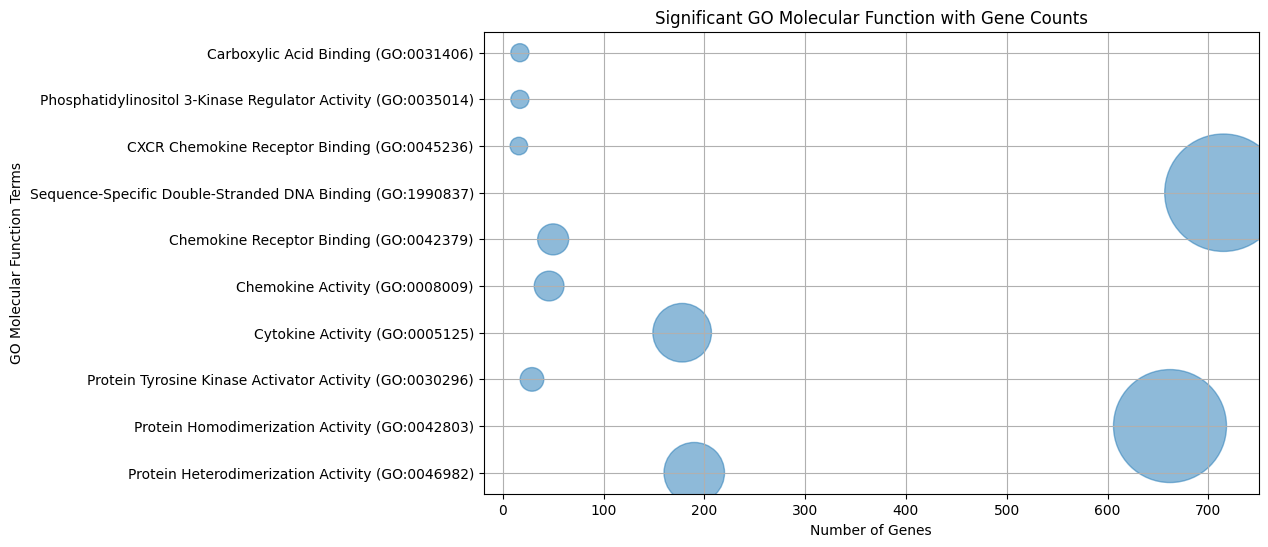

In [ ]:
import matplotlib.pyplot as plt

# Extract significant terms for GO Molecular Function
top_terms_mf = enrichment_results_go_mf.res2d.sort_values(by='Adjusted P-value').head(10)
terms_mf = top_terms_mf['Term']
gene_counts_mf = [int(overlap.split('/')[1]) for overlap in top_terms_mf['Overlap']]

# Create plot for GO Molecular Function
plt.figure(figsize=(10, 6))
plt.scatter(gene_counts_mf, terms_mf, s=[count*10 for count in gene_counts_mf], alpha=0.5)
plt.xlabel('Number of Genes')
plt.ylabel('GO Molecular Function Terms')
plt.title('Significant GO Molecular Function with Gene Counts')
plt.grid(True)
plt.show()

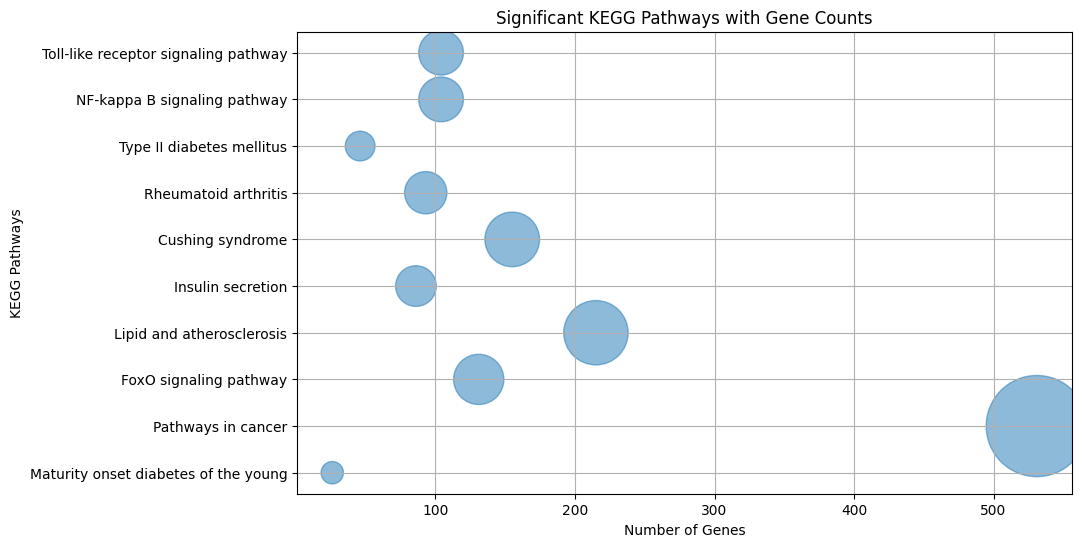

In [ ]:
# Extract significant terms
top_kegg_terms = enrichment_results_kegg.res2d.sort_values(by='Adjusted P-value').head(10)
kegg_terms = top_kegg_terms['Term']
kegg_gene_counts = [int(overlap.split('/')[1]) for overlap in top_kegg_terms['Overlap']]

# Create plot for KEGG pathways
plt.figure(figsize=(10, 6))
plt.scatter(kegg_gene_counts, kegg_terms, s=[count*10 for count in kegg_gene_counts], alpha=0.5)
plt.xlabel('Number of Genes')
plt.ylabel('KEGG Pathways')
plt.title('Significant KEGG Pathways with Gene Counts')
plt.grid(True)
plt.show()

In [ ]:
import gseapy as gp

# Define your gene list (ranked genes)
gene_list = '72_genes.csv'

# Run GSEA for GO Biological Process gene sets
enrichment_results_go_bp = gp.enrichr(gene_list=gene_list, gene_sets='GO_Biological_Process_2023', organism='Human')

# Run GSEA for KEGG gene sets
enrichment_results_kegg = gp.enrichr(gene_list=gene_list, gene_sets='KEGG_2021_Human', organism='Human')

# Run GSEA for GO Molecular Function gene sets
enrichment_results_go_mf = gp.enrichr(gene_list=gene_list, gene_sets='GO_Molecular_Function_2023', organism='Human')

# Define threshold for adjusted p-value
threshold = 0.005

# Filter results based on threshold
filtered_results_go_bp = enrichment_results_go_bp.res2d[enrichment_results_go_bp.res2d['Adjusted P-value'] < threshold]
filtered_results_kegg = enrichment_results_kegg.res2d[enrichment_results_kegg.res2d['Adjusted P-value'] < threshold]
filtered_results_go_mf = enrichment_results_go_mf.res2d[enrichment_results_go_mf.res2d['Adjusted P-value'] < threshold]

# Interpret the results
print("GO Biological Process:")
print(filtered_results_go_bp.head())

print("\nKEGG Pathways:")
print(filtered_results_kegg.head())

print("GO Molecular Function:")
print(filtered_results_go_mf.head())

GO Biological Process:
                     Gene_set  \
0  GO_Biological_Process_2023   
1  GO_Biological_Process_2023   
2  GO_Biological_Process_2023   
3  GO_Biological_Process_2023   
4  GO_Biological_Process_2023   

                                                Term Overlap       P-value  \
0       Regulation Of Insulin Secretion (GO:0050796)   10/87  7.074749e-13   
1                   Glucose Homeostasis (GO:0042593)   10/87  7.074749e-13   
2       Regulation Of Apoptotic Process (GO:0042981)  14/705  2.167493e-07   
3   Regulation Of Inflammatory Response (GO:0050727)   9/240  2.211051e-07   
4  Positive Regulation Of Protein Secretion (GO:0...    6/76  3.425811e-07   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0      4.255461e-10            0                     0   40.919398   
1      4.255461e-10            0                     0   40.919398   
2      6.649735e-05            0                     0    6.605607   
3      6.649735e-05          

In [ ]:
import gseapy as gp

# Define your gene list (ranked genes)
gene_list = '72_genes.csv'

# Run GSEA for GO Biological Process gene sets
enrichment_results_go_bp = gp.enrichr(gene_list=gene_list, gene_sets='GO_Biological_Process_2023', organism='Human')

# Run GSEA for KEGG gene sets
enrichment_results_kegg = gp.enrichr(gene_list=gene_list, gene_sets='KEGG_2021_Human', organism='Human')

# Run GSEA for GO Molecular Function gene sets
enrichment_results_go_mf = gp.enrichr(gene_list=gene_list, gene_sets='GO_Molecular_Function_2023', organism='Human')

# Define significance threshold
threshold = 0.05  # Adjusted p-value threshold

# Filter results based on adjusted p-value
filtered_go_bp = enrichment_results_go_bp.res2d[enrichment_results_go_bp.res2d['Adjusted P-value'] < threshold]
filtered_kegg = enrichment_results_kegg.res2d[enrichment_results_kegg.res2d['Adjusted P-value'] < threshold]
filtered_go_mf = enrichment_results_go_mf.res2d[enrichment_results_go_mf.res2d['Adjusted P-value'] < threshold]

# Display filtered results
print("Significantly enriched GO Biological Process terms:")
print(filtered_go_bp)

print("\nSignificantly enriched KEGG pathways:")
print(filtered_kegg)

print("\nSignificantly enriched GO Molecular Function terms:")
print(filtered_go_mf)

Significantly enriched GO Biological Process terms:
                       Gene_set  \
0    GO_Biological_Process_2023   
1    GO_Biological_Process_2023   
2    GO_Biological_Process_2023   
3    GO_Biological_Process_2023   
4    GO_Biological_Process_2023   
..                          ...   
232  GO_Biological_Process_2023   
233  GO_Biological_Process_2023   
234  GO_Biological_Process_2023   
235  GO_Biological_Process_2023   
236  GO_Biological_Process_2023   

                                                  Term Overlap       P-value  \
0         Regulation Of Insulin Secretion (GO:0050796)   10/87  7.074749e-13   
1                     Glucose Homeostasis (GO:0042593)   10/87  7.074749e-13   
2         Regulation Of Apoptotic Process (GO:0042981)  14/705  2.167493e-07   
3     Regulation Of Inflammatory Response (GO:0050727)   9/240  2.211051e-07   
4    Positive Regulation Of Protein Secretion (GO:0...    6/76  3.425811e-07   
..                                             